In [108]:
import csv
import json
from operator import itemgetter
import re
import string
from collections import Counter
import numpy as np

# Word Cloud

In [27]:
with open("Release_timelines.json") as f:
    timelines = json.load(f)

In [28]:
# first get a list of lists
tweets_list = [timelines[m] for m in timelines]

In [91]:
def clean(tweet):
    #tweet = tweet.encode("ascii", "ignore")
    cleaned_words = [word.lower() for word in tweet.split() if
                     "http" not in word and
                     not word.startswith("@") and
                     not word.startswith(".@") and
                     not word.startswith("#") and
                     word != "RT"]
    for i in range(len(cleaned_words)):
        if "&amp;" in cleaned_words[i]:
            cleaned_words[i] = cleaned_words[i].replace("&amp;", " and ")
        if "&gt;" in cleaned_words[i]:
            cleaned_words[i] = cleaned_words[i].replace("&gt;", "")
        if "&lt;" in cleaned_words[i]:
            cleaned_words[i] = cleaned_words[i].replace("&lt;", "")
    return " ".join(cleaned_words)


def all_punct(tweet):
    # all([c in string.punctuation for c in tweet])
    return set(tweet).issubset(set(string.punctuation + "’" + "“" + " "))


def remove_punct(word):
    exclude = set(string.punctuation + "’" + "“" + " ")
    return "".join(c for c in word if c not in exclude)

In [92]:
# http://www.textfixer.com/resources/common-english-words.txt
with open("common-english-words.txt") as f:
    stopwords = next(csv.reader(f))

In [93]:
extra_words = {"amp", "its", "hes","cant", "dont", "youre", "ive", "youve","thats", "whos", "youll", "htt…", "ht…",
               "lets", "isnt", "theyre", "havent", "didnt", "were", "shes", "doesnt", "weve", "couldnt", "wont", 
               "yours", "yall", "youll", "los", "mrs", "youd", "itll", "without", "wasnt", "aint"}
stopwords = set(stopwords)
stopwords.update(extra_words)

In [94]:
def tokenize(tweet):
    words = [remove_punct(w) for w in clean(tweet).split() if
             not all_punct(w)]
    words = [w for w in words if w not in stopwords]
    return " ".join(words)

In [95]:
tweets_list = [[tokenize(tweet) for tweet in tweets] for tweets in tweets_list]
tokens_list = [" ".join(tweets) for tweets in tweets_list]

words = " ".join(tokens_list).split()
#vocab = sorted(set(words))

In [96]:
Counter([w for w in words if len(w)>2]).most_common()

[('see', 9150),
 ('now', 8620),
 ('new', 6852),
 ('tix', 6285),
 ('unlocked', 5126),
 ('theaters', 4540),
 ('watch', 4195),
 ('trailer', 3353),
 ('select', 3248),
 ('cities', 3145),
 ('70mm', 3121),
 ('glorious', 3118),
 ('avail', 3107),
 ('friday', 3037),
 ('movie', 2700),
 ('congrats', 2584),
 ('sneak', 2487),
 ('preview', 2468),
 ('brand', 2415),
 ('out', 2414),
 ('love', 1448),
 ('premiere', 1422),
 ('one', 1415),
 ('here', 1357),
 ('film', 1332),
 ('best', 1309),
 ('today', 1150),
 ('more', 1131),
 ('wait', 1103),
 ('tonight', 1079),
 ('great', 1068),
 ('time', 1059),
 ('tickets', 1041),
 ('good', 1021),
 ('ready', 941),
 ('saw', 909),
 ('live', 849),
 ('amazing', 847),
 ('check', 837),
 ('cast', 816),
 ('chapter', 786),
 ('insidious', 782),
 ('die', 769),
 ('thanks', 756),
 ('day', 748),
 ('excited', 738),
 ('screening', 733),
 ('tomorrow', 719),
 ('loved', 715),
 ('favorite', 707),
 ('night', 707),
 ('know', 690),
 ('weekend', 662),
 ('world', 654),
 ('seen', 650),
 ('exclusive'

In [10]:
#frequent_words = [w for w in vocab if len(w) > 4 and words.count(w) > 30]

In [36]:
%matplotlib inline

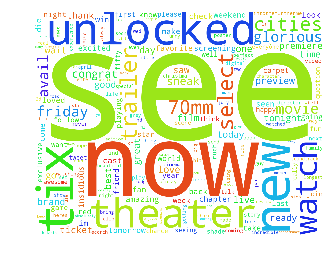

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(" ".join(tokens_list))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_3.png', dpi=300)
plt.show()

# frequent hashtags

In [114]:
def get_hashtags(tweet):
    #tweet = tweet.encode("ascii", "ignore")
    hashtags = [word.lower() for word in tweet.split() if word.startswith("#")]
    return " ".join(hashtags)

In [115]:
hashtags_list = [[get_hashtags(tweet) for tweet in timelines[movie]] for movie in timelines.keys()]
hashtokens_list = [" ".join(h) for h in hashtags_list]

hashtags = [remove_punct(h) for h in " ".join(hashtokens_list).split("#")]

In [116]:
freq_hash = Counter([w for w in hashtags]).most_common()

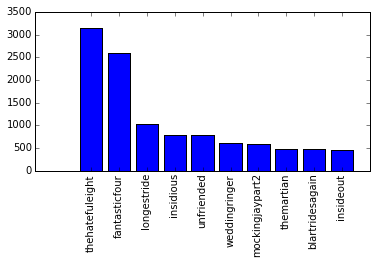

In [149]:
hashtag = list(zip(*freq_hash))[0][0:10]
counts = list(zip(*freq_hash))[1][0:10]
x_pos = np.arange(len(hashtag)) 
   
plt.bar(x_pos, counts, align='center')
plt.xticks(x_pos, hashtag, rotation='vertical')
plt.gcf().subplots_adjust(bottom=0.35)
plt.savefig('./hashtags.png', dpi=300)
plt.show()

# frequent hashtags (modified)

In [158]:
movienames = {name.lower() for name in timelines.keys()}
movienames2 = {n.replace("movie", "movies") for n in movienames}
movienames3 = {n.replace("movies", "movie") for n in movienames}
movienames4 = {n.replace("movie", "") for n in movienames}
movienames5 = {n.replace("movies", "") for n in movienames}
movienames6 = {n.replace("the", "") for n in movienames}
movienames7 = {n.replace("film", "movie") for n in movienames}
extra_names = {"mockingjaypart2", "themartian", "blartridesagain", "insideout", "magicmikexxl", "nightatthemuseum", 
               "hotelt2", "scorchtrials", "adaline", "theforceawakens", "lultimocacciatoredistreghe", "sxsw", 
               "missionimpossible", "ageofultron", "straightouttacompton", "taken3", "spectre", "terminatorgenisys", 
               "rickiandtheflash", "lanottedellestreghe"}

movienames.update(movienames2, movienames3, movienames4, movienames5, movienames6, movienames7, extra_names)

In [159]:
movienames 

{'007',
 'adaline',
 'ageofadaline',
 'ageofultron',
 'alvin',
 'alvinmovie',
 'alvinmovies',
 'alvinmoviess',
 'alvins',
 'americansniper',
 'antman',
 'avengers',
 'awalkinwoodsmov',
 'bigshort',
 'blackmass',
 'blackmassmovie',
 'blackmassmovies',
 'blartridesagain',
 'boynextdoor',
 'bridgeofspies',
 'chappiemovie',
 'chappiethe',
 'chappiethemovie',
 'chappiethemovies',
 'cinderella',
 'cinderellamovie',
 'cinderellamovies',
 'compton',
 'comptonmovie',
 'comptonmovies',
 'concussion',
 'concussionmovie',
 'concussionmovies',
 'creed',
 'creedmovie',
 'creedmovies',
 'crimsonpeak',
 'daddyshome',
 'divergentseries',
 'duff',
 'entourage',
 'entouragemovie',
 'entouragemovies',
 'everest',
 'everestmovie',
 'everestmovies',
 'exmachina',
 'exmachinamovie',
 'exmachinamovies',
 'fantasticfour',
 'fastfurious',
 'fiftyshades',
 'focusmoviesuk',
 'focusmovieuk',
 'focusuk',
 'gethard',
 'gethardmovie',
 'gethardmovies',
 'gift',
 'giftmovie',
 'giftmovies',
 'gooddinosaur',
 'goosebum

In [160]:
freq_hash2 = Counter([w for w in hashtags if w not in movienames]).most_common()

In [161]:
freq_hash2

[('onelasttime', 225),
 ('whatareyouafraidof', 223),
 ('neverhaveiever', 215),
 ('thenightbefore', 187),
 ('cfwatchparty', 180),
 ('thgwatchparty', 177),
 ('tiff15', 167),
 ('periscope', 149),
 ('greeniescreening', 134),
 ('jenniferlawrence', 132),
 ('gooddino', 131),
 ('starwarsrebels', 127),
 ('mockingjaytickets', 120),
 ('tbt', 112),
 ('jupiterascending', 111),
 ('1', 110),
 ('spymovie', 109),
 ('gladerfamily', 107),
 ('insurgent', 106),
 ('sheneverleft', 105),
 ('nowplaying', 102),
 ('paddington', 96),
 ('ifightfor', 96),
 ('blartations', 96),
 ('sinister2', 91),
 ('owenwilson', 85),
 ('marchon', 81),
 ('takeahike', 78),
 ('tinytourists', 75),
 ('askinsideout', 75),
 ('journeytomars', 74),
 ('whyiunfriendedyou', 74),
 ('theweddingringer', 73),
 ('brittrobertson', 73),
 ('willferrell', 66),
 ('getlostgetfound', 66),
 ('5centadvice', 65),
 ('readyforscorchtrials', 64),
 ('iheartlongestride', 63),
 ('vacationfail', 62),
 ('fortheplayers', 62),
 ('goldenglobes', 62),
 ('girlsnightout',

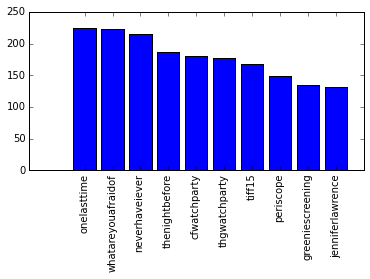

In [162]:
hashtag2 = list(zip(*freq_hash2))[0][0:10]
counts2 = list(zip(*freq_hash2))[1][0:10]
x_pos2 = np.arange(len(hashtag2)) 
   
plt.bar(x_pos2, counts2, align='center')
plt.xticks(x_pos2, hashtag2, rotation='vertical')
plt.gcf().subplots_adjust(bottom=0.35)
plt.savefig('./hashtags2.png', dpi=300)
plt.show()